# TOTAL CASES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv('Final.csv')

In [3]:
data.head()

,Tỉnh/TP,Tổng số ca,Hôm nay,Tử vong,Diện tích (km²),Dân số (người),Vĩ độ,Kinh độ
0,An Giang,2373,88.0,4,3536,1864651,10.507203,105.117695
1,Bà Rịa - Vũng Tàu,3869,22.0,32,1980,1181302,10.483384,107.124514
2,Bắc Giang,588,1.0,13,3851,1858540,21.281595,106.200434
3,Bắc Kạn,7,0.0,0,4860,318083,22.421294,105.852338
4,Bạc Liêu,240,9.0,0,2669,917734,9.281929,105.755530


In [4]:
data.dtypes

Tỉnh/TP             object
Tổng số ca           int64
Hôm nay            float64
Tử vong              int64
Diện tích (km²)      int64
Dân số (người)       int64
Vĩ độ              float64
Kinh độ            float64
dtype: object

In [5]:
data['Tử vong']=data['Tử vong'].astype(int)
data['Hôm nay']=data['Hôm nay'].astype(int)
data['Dân số (người)']=data['Dân số (người)'].astype(int)

# POPULATION / AREA

In [6]:
data['Dân số (người)'].sort_values()

3      318083
33     480588
13     535098
32     565685
41     595698
       ...   
18    3236248
39    3417809
54    3690022
23    8418883
57    9411805
Name: Dân số (người), Length: 63, dtype: int32

In [7]:
data['Diện tích (km²)'].sort_values()

5       822
22      860
29      930
61     1235
14     1284
      ...  
54    11114
15    13030
50    14123
20    15510
39    16493
Name: Diện tích (km²), Length: 63, dtype: int64

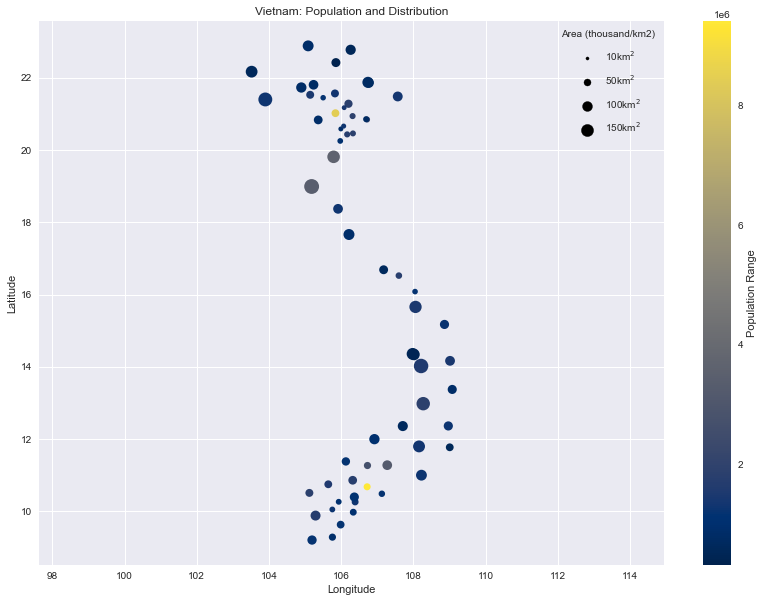

In [8]:
# Extract info:
lon,lat=data['Kinh độ'], data['Vĩ độ']
pop,area=data['Dân số (người)'], data['Diện tích (km²)']
plt.style.use('seaborn')
plt.figure(figsize=(14,10))

# Create plot:
plt.scatter( lon,lat, 
            c=pop, cmap='cividis',
           s=area/100, linewidths=2 )
plt.axis('equal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Population Range')
plt.title('Vietnam: Population and Distribution')

# Create legend:
area_range=[10,50,100,150]
for i in area_range:
    plt.scatter([], [], s=i, label=str(i)+ 'km$^2$',c='k')
plt.legend(labelspacing=1, title="Area (thousand/km2)");

# TOTAL CASES & DEATHS

In [9]:
data.head()

,Tỉnh/TP,Tổng số ca,Hôm nay,Tử vong,Diện tích (km²),Dân số (người),Vĩ độ,Kinh độ
0,An Giang,2373,88,4,3536,1864651,10.507203,105.117695
1,Bà Rịa - Vũng Tàu,3869,22,32,1980,1181302,10.483384,107.124514
2,Bắc Giang,588,1,13,3851,1858540,21.281595,106.200434
3,Bắc Kạn,7,0,0,4860,318083,22.421294,105.852338
4,Bạc Liêu,240,9,0,2669,917734,9.281929,105.755530


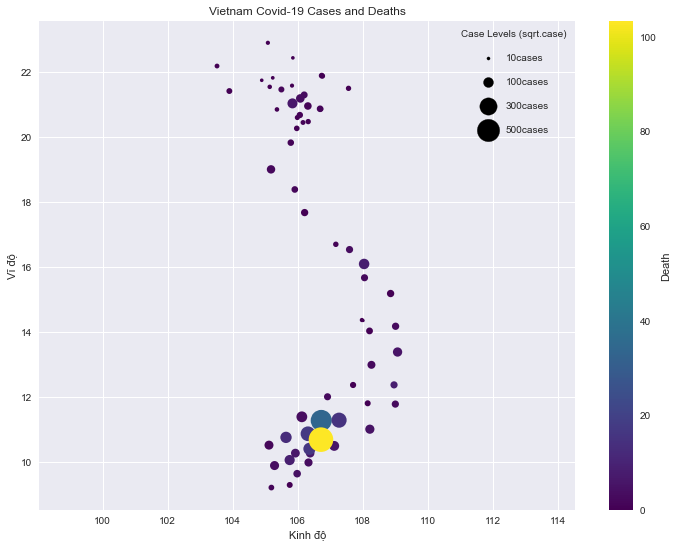

In [10]:
# Extract info:
lon,lat=data['Kinh độ'], data['Vĩ độ']
case,death=data['Tổng số ca'], data['Tử vong']
plt.style.use('seaborn')
plt.figure(figsize=(12,9))

# Create plot:
plt.scatter( lon,lat, 
            c=np.sqrt(death), cmap='viridis',
           s=np.sqrt(case), linewidths=2 )
plt.axis('equal')
plt.xlabel('Kinh độ')
plt.ylabel('Vĩ độ')
plt.colorbar(label='Death')
plt.title('Vietnam Covid-19 Cases and Deaths')

#Create legend:
area_range=[10,100,300,500]
for i in area_range:
    plt.scatter([], [], s=i, label=str(i)+'cases',c='k')
plt.legend(labelspacing=1.5, title="Case Levels (sqrt.case)");

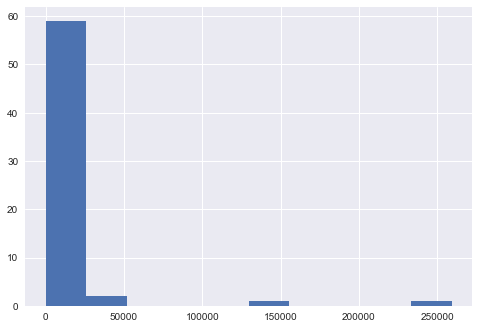

In [12]:
plt.hist(case);

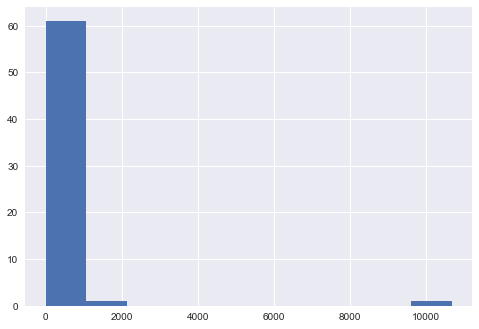

In [14]:
plt.hist(death);

In [17]:
death.mean()

212.46031746031747

In [18]:
case.mean()

8334.317460317461